In [125]:
# let's make the winner state here 010

In [126]:
from qiskit import *
grover = QuantumCircuit(3)

# first gates:
grover.h([0,1,2])

In [127]:
# oracle:
grover.ccz(0,2, 1)
# where the 1st and 3rd qubits are the control, and the target is the 2nd (the one with |1> in the winner state

In [128]:
# reflection operator
grover.h([0,1,2])
grover.z([0,1,2])
grover.cz(0,1)
grover.cz(1,2)
grover.h([0,1,2])

In [129]:
# measurement
grover.measure_all()

# simulation
simulator = Aer.get_backend('qasm_simulator')
result = execute(grover, backend=simulator).result()
counts = result.get_counts(grover)
print(counts)

{'011': 126, '001': 136, '110': 117, '111': 526, '100': 119}


In [130]:
# following the steps i wrote on my notebook

In [131]:
# circuits
main = QuantumCircuit(4)
oracle = QuantumCircuit(4, name='oracle')
reflection = QuantumCircuit(4, name='reflection')

In [132]:
# winner state: 0011

In [133]:
main.h([0,1,2,3])

# oracle gate
oracle.h([0,1,2,3])
oracle.cz(0,1)
oracle.cz(1,2)
oracle.cz(2,3)
oracle.to_gate()

oracle.draw()

┌───┐         
q_0: ┤ H ├─■───────
     ├───┤ │       
q_1: ┤ H ├─■──■────
     ├───┤    │    
q_2: ┤ H ├────■──■─
     ├───┤       │ 
q_3: ┤ H ├───────■─
     └───┘

In [134]:
# reflection gate
reflection.h([0,1,2,3])
reflection.z(2)
reflection.cz(1,2)
reflection.z(3)
reflection.cz(0,3)
reflection.to_gate()

reflection.draw()

┌───┐           
q_0: ┤ H ├─────────■─
     ├───┤         │ 
q_1: ┤ H ├──────■──┼─
     ├───┤┌───┐ │  │ 
q_2: ┤ H ├┤ Z ├─■──┼─
     ├───┤├───┤    │ 
q_3: ┤ H ├┤ Z ├────■─
     └───┘└───┘

In [135]:
main.append(oracle,[0,1,2,3])
main.append(reflection,[0,1,2,3])

main.draw()

┌───┐┌─────────┐┌─────────────┐
q_0: ┤ H ├┤0        ├┤0            ├
     ├───┤│         ││             │
q_1: ┤ H ├┤1        ├┤1            ├
     ├───┤│  oracle ││  reflection │
q_2: ┤ H ├┤2        ├┤2            ├
     ├───┤│         ││             │
q_3: ┤ H ├┤3        ├┤3            ├
     └───┘└─────────┘└─────────────┘

In [136]:
main.measure_all()
main.draw()

┌───┐┌─────────┐┌─────────────┐ ░ ┌─┐         
   q_0: ┤ H ├┤0        ├┤0            ├─░─┤M├─────────
        ├───┤│         ││             │ ░ └╥┘┌─┐      
   q_1: ┤ H ├┤1        ├┤1            ├─░──╫─┤M├──────
        ├───┤│  oracle ││  reflection │ ░  ║ └╥┘┌─┐   
   q_2: ┤ H ├┤2        ├┤2            ├─░──╫──╫─┤M├───
        ├───┤│         ││             │ ░  ║  ║ └╥┘┌─┐
   q_3: ┤ H ├┤3        ├┤3            ├─░──╫──╫──╫─┤M├
        └───┘└─────────┘└─────────────┘ ░  ║  ║  ║ └╥┘
meas_0: ═══════════════════════════════════╩══╬══╬══╬═
                                              ║  ║  ║ 
meas_1: ══════════════════════════════════════╩══╬══╬═
                                                 ║  ║ 
meas_2: ═════════════════════════════════════════╩══╬═
                                                    ║ 
meas_3: ════════════════════════════════════════════╩═

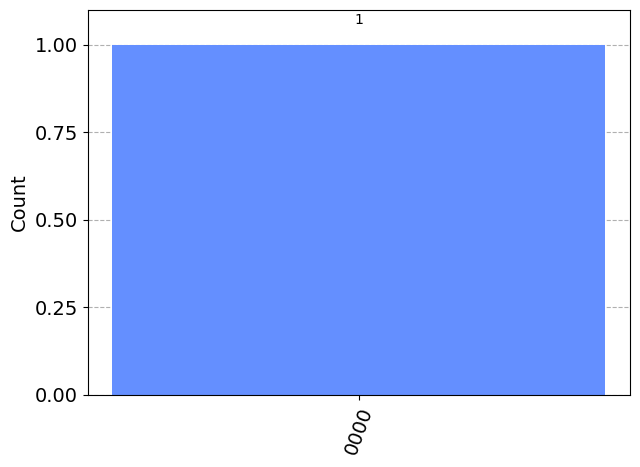

In [137]:
from qiskit.tools.visualization import plot_histogram
simulator = Aer.get_backend('statevector_simulator')
result = execute(main, backend=simulator).result()
plot_histogram(result.get_counts(main))

In [138]:
counts = result.get_counts(main)
print(counts)

{'0000': 1}
